**What model did you use for making predictions or solving the problem**

We used a geo-dataframe with a geometry column for passing to the K-means cluster analysis function. K-means requires coordinates under the geometry class to predict the clustering. It also requires a predetermined number of clusters to search for; we determined the appropriate number of clusters using the Elbow Method. The Elbow Method is a visual method for determining the general number of clusters represented in a dataset with geometric coordinates.

**Why did you select that model?**

We used the model to identify trends in float glass location. We hypothesized that float glass plant locations will be clustered around areas of lower electricity price. The K-means clustering analyses supports this hypothesis, with electricity prices to float glass plants dense in the low electricity price range (4 to 8 cents per kilowatt-hour).

In [1]:
!pip install ipynb

In [66]:
from ipynb.fs.full.Lat_Lon_Mapping import *

In [67]:
#K-means clustering analysis
#Reference code: https://samdotson1992.github.io/SuperGIS/blog/k-means-clustering/
from sklearn.cluster import KMeans
import requests
from shapely.geometry import Point
import seaborn

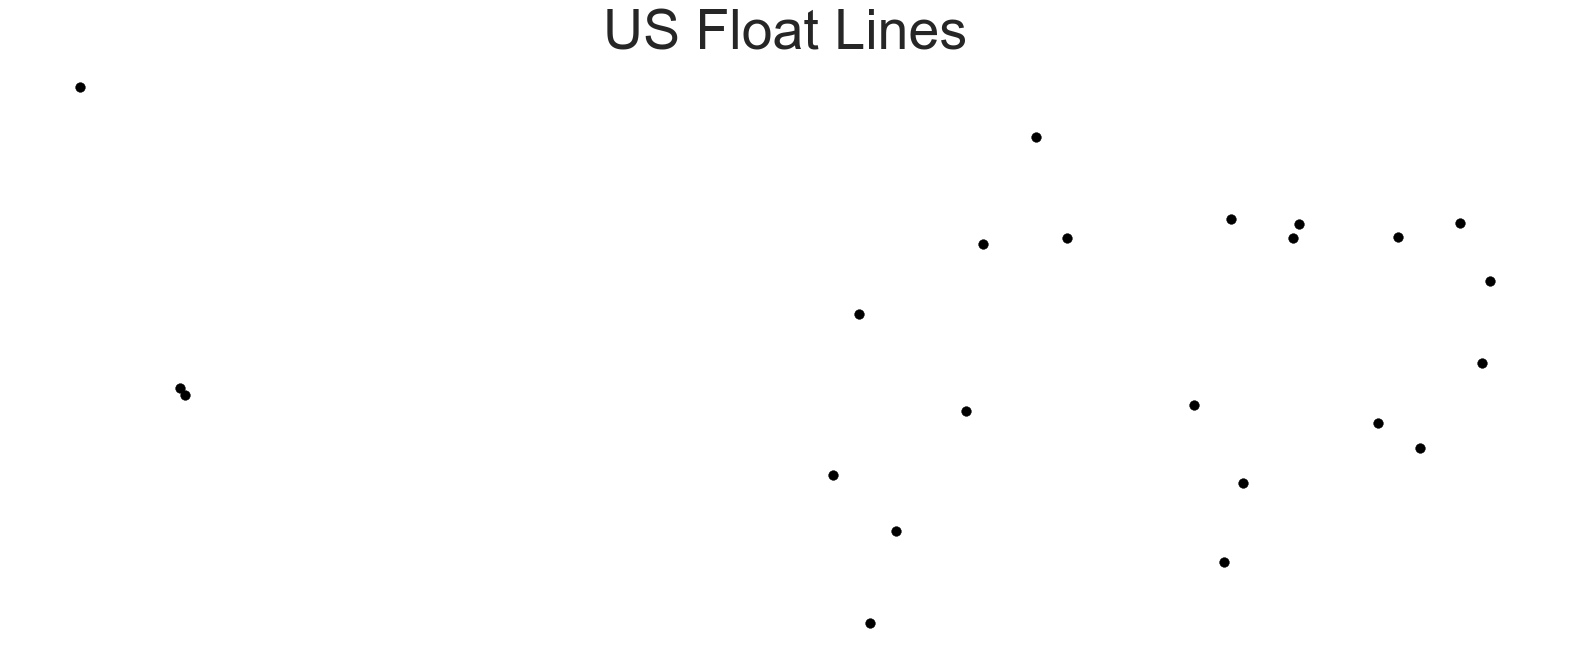

In [68]:
#Checking for float plant GeoDataFrame integrity as pointplot
fig, ax = plt.subplots(1, figsize=(20, 15))
ax.set_title("US Float Lines", fontsize=40)
ax.set_axis_off()
WOGDFF_GDF.plot(ax=ax, color='black')
plt.show()

In [69]:
#Pulling lat-lon coordinates from float plant GeoDataFrame for k-means
a=pd.Series(WOGDFF_GDF['geometry'].apply(lambda p: p.x))
b=pd.Series(WOGDFF_GDF['geometry'].apply(lambda p: p.y))
X=np.column_stack((a,b))

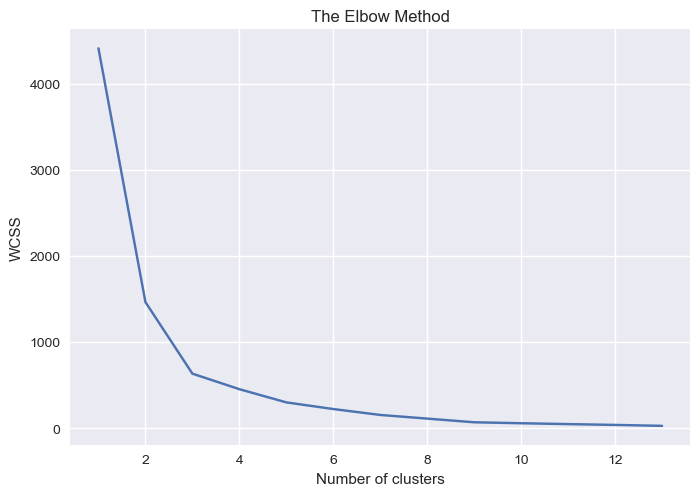

In [70]:
#Running k-means on constructed lat-lon dataset
wcss = []

"""K-Means method"""
for i in range(1, 14):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
"""Optimum cluster visualization"""
plt.plot(range(1, 14), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [71]:
#Optimum number of clusters appears to be 3 based on TEM
#Try 4
optimal_cluster = 4

**How was the model trained**

The model includes convergence within its functionality, so it trains itself on identifying clusters by running the K-means clustering algorithm over hundreds of iterations and on different cluster centers. The cluster center with the least distance to corresponding elements is eventually found and determines the origin of each cluster resulting from the model.

**Did you follow train, test and cross-validation protocols?**

We performed K-means clustering on 2 different cluster numbers: 3 and 4. For 3 clusters, we achieved a consistent result at 400 iterations that did not vary between runs. We achieved a consistent result for 4 clusters at 400 iterations as well. Validation was performed using the Elbow Method and the 3 cluster result was determined as the most accurate representation of clustering.

In [72]:
#Conducting k-means test
kmeans = KMeans(n_clusters = optimal_cluster, init = 'k-means++', random_state = 5,  max_iter=400)
y_kmeans = kmeans.fit_predict(X)
k=pd.DataFrame(y_kmeans, columns=['cluster'])

#Joining results of k-means clustering with original pointplot
WOGDFF_GDF=WOGDFF_GDF.join(k)

Text(0.5, 1.0, 'US Glass Float Lines Clustering (4)')

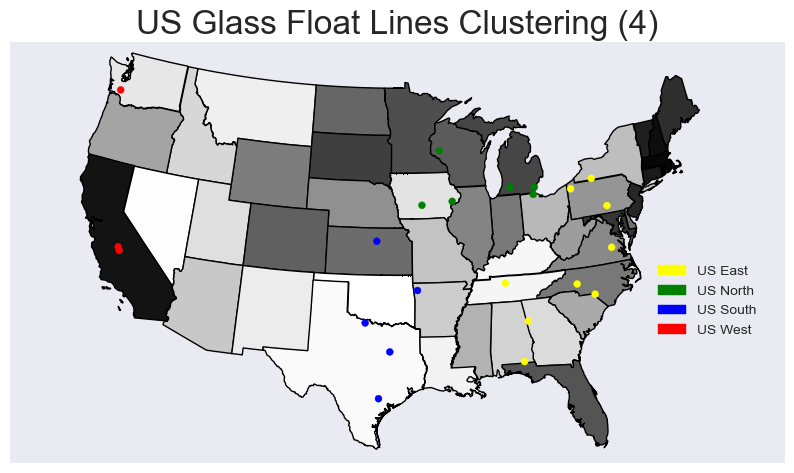

In [75]:
#Joined k-means_pointplot with us polyplot
plt.style.use('seaborn')

Kusa = gplt.choropleth(
  usa,
  hue=usa['Electrical Price'],
  edgecolor="black",
  linewidth=1,
  cmap="Greys",
  projection=gcrs.AlbersEqualArea(),
  figsize=(10, 10)
)

#Creating custom color map for cluster visualization
#Reference code:https://matplotlib.org/stable/tutorials/colors/colorbar_only.html
import matplotlib as mpl
Ccmap = mpl.colors.ListedColormap(['yellow', 'red', 'blue', 'green' ])


KWOG = gplt.pointplot(
  WOGDFF_GDF,
  cmap=Ccmap,
  hue=WOGDFF_GDF['cluster'],
  limits=(3, 50),
  zorder=2,
  ax=Kusa,
  extent=extent
)

#Creating custom legend for clusters
#Reference code:https://matplotlib.org/2.0.2/users/legend_guide.html
import matplotlib.patches as mpatches

"""Cluster handle definitions"""
cluster1 = mpatches.Patch(color='yellow', label='US East')
cluster2 = mpatches.Patch(color='green', label='US North')
cluster3 = mpatches.Patch(color='blue', label='US South')
cluster4 = mpatches.Patch(color='red', label='US West')
plt.legend(handles=[cluster1, cluster2, cluster3, cluster4])


#Move Legend to empty space
KWOG.get_legend().set_bbox_to_anchor((0.82, 0.5))

#Title
KWOG.set_title('US Glass Float Lines Clustering (4)', fontdict={'fontsize':24})

In [74]:
#Electrical Price Histogram
"""Creating new column"""
WOGDFF_GDFEP = pd.DataFrame(columns=['Electrical Price'])

"""Joining column"""
WOGDFF_GDF['Electrical Price'] = WOGDFF_GDFEP

"""Mapping electrical prices from usa to WOGDFF_GDF"""
"""Creating intermediary dictionary for mapping values"""
EPD = {}
for i in range(len(usa['STATE_ABBR'])):
    EPD[usa['STATE_ABBR'][i+1]] = usa['Electrical Price'][i+1]
   
"""Mapping values"""
for i in range(len(WOGDFF_GDF['State'])):
    WOGDFF_GDF['Electrical Price'][i] = EPD[WOGDFF_GDF['State'][i]]

<ipython-input-74-91252638d2f3>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  WOGDFF_GDF['Electrical Price'][i] = EPD[WOGDFF_GDF['State'][i]]


In [11]:
WOGDFF_GDF

,Company Name,Country,City,State,Number of Lines,lon,lat,geometry,cluster,Electrical Price
0,Guardian Glass,US,"Kingsburg ,US",CA,1,-119.553893,36.513840,POINT (-119.55389 36.51384),1,12.92
1,Vitro Architectural Glass,US,"Fresno ,US",CA,1,-119.708861,36.729529,POINT (-119.70886 36.72953),1,12.92
2,Fuyao Glass Industry Group Co. Ltd.,US,"Mt. Zion ,US",IL,2,-85.187170,33.634275,POINT (-85.18717 33.63428),0,6.47
3,Nippon Sheet Glass,US,"Ottawa ,US",IL,1,-97.656809,39.127365,POINT (-97.65681 39.12737),2,6.47
4,Guardian Glass,US,"DeWitt ,US",IA,1,-97.315846,29.093133,POINT (-97.31585 29.09313),2,5.46
5,AGC (Asahi Glass Co.),US,"Spring Hill ,US",KS,1,-93.647987,41.411763,POINT (-93.64799 41.41176),3,7.01
6,AGC (Asahi Glass Co.),US,"Richmond ,US",KY,1,-77.434280,37.538509,POINT (-77.43428 37.53851),0,5.13
7,Guardian Glass,US,"Carleton ,US",MI,2,-83.390766,42.059210,POINT (-83.39077 42.05921),3,7.58
8,Guardian Glass,US,"Geneva ,US",NY,1,-85.803014,31.086293,POINT (-85.80301 31.08629),0,5.61
9,Cardinal Glass Industries,US,"Mooresville ,US",NC,1,-80.810072,35.584860,POINT (-80.81007 35.58486),0,6.63


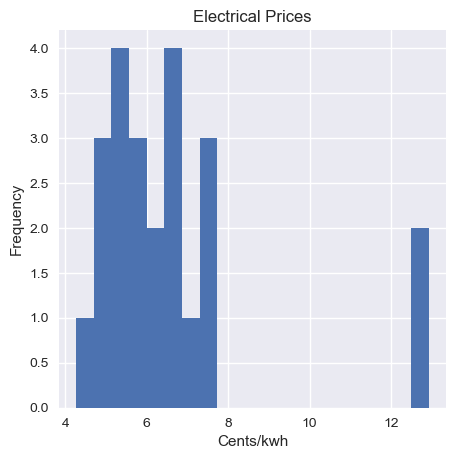

In [12]:
#Style code:https://www.machinelearningplus.com/plots/matplotlib-histogram-python-examples/
import seaborn

plt.style.use('seaborn')
plt.rcParams.update({'figure.figsize':(5,5), 'figure.dpi':100})
plt.hist(WOGDFF_GDF['Electrical Price'], bins=20)
plt.gca().set(title='Electrical Prices', ylabel='Frequency', xlabel='Cents/kwh');

**Have you clearly stated the conclusion from your project?**

We conclude that glass plant locations comprise 3 clusters: Western US, Midwest US, and Eastern US clusters. West and Midwest clusters are distributed within areas of predominantly lower electricity price, though we cannot say if this distribution is intentional. 

We can charge an average of 6 cents per kilowatt-hour to remain competitive with on-grid electricity rates, with more or less charged depending on the exact location. This conclusion can be justified based on the first mode of the electricity price distribution, which is centered around 6 cents per kilowatt-hour.